# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

<h3>Etapas a serem seguidos:</h3>
<ul>
    <li>Entendimento do desafio a ser resolvido;</li>
    <li>Entendimento da empresa/área;</li>
    <li>Extração/Obtenção de dados;</li>
    <li>Ajuste de dados (limpeza de dados);</li>
    <li>Análise exploratória;</li>
    <li>Modelagem + algoritmos;</li>
    <li>Interpretação dos resultados;</li>
    <li>Deploy/Produção;</li>
</ul>
<hr>

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Importar Bibliotecas e Bases de Dados

In [61]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

### Consolidar Base de Dados

In [62]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}
caminhoBaseDados = Path('dataset')
baseDadosArbnb = pd.DataFrame()

for arquivo in caminhoBaseDados.iterdir():
#Criando colunas que armazenará ano e mês.
    mes = meses[arquivo.name[:3]]
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    df = pd.read_csv(caminhoBaseDados / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    
#Percorrendo todos os arquivos csv e transformando numa base de dados única.
    baseDadosArbnb = pd.concat([baseDadosArbnb, df])

C:\Users\renan.leal\AppData\Local\Temp\ipykernel_6176\3615327730.py:10: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhoBaseDados / arquivo.name)
C:\Users\renan.leal\AppData\Local\Temp\ipykernel_6176\3615327730.py:10: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhoBaseDados / arquivo.name)
C:\Users\renan.leal\AppData\Local\Temp\ipykernel_6176\3615327730.py:10: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhoBaseDados / arquivo.name)
C:\Users\renan.leal\AppData\Local\Temp\ipykernel_6176\3615327730.py:10: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhoBaseDados / arquivo.name)
C:\Users\renan.leal\AppData\Local\Temp\ipykernel_6176\3615327730.py:10: DtypeWarning:

In [63]:
display(baseDadosArbnb.head())

id                         listing_url       scrape_id last_scraped  \
0  14063  https://www.airbnb.com/rooms/14063  20180414160018   2018-04-14   
1  17878  https://www.airbnb.com/rooms/17878  20180414160018   2018-04-14   
2  24480  https://www.airbnb.com/rooms/24480  20180414160018   2018-04-14   
3  25026  https://www.airbnb.com/rooms/25026  20180414160018   2018-04-14   
4  31560  https://www.airbnb.com/rooms/31560  20180414160018   2018-04-14   

                                        name  \
0                       Living in a Postcard   
1          Very Nice 2Br - Copacabana - WiFi   
2           Nice and cozy near Ipanema Beach   
3  Beautiful Modern Decorated Studio in Copa   
4           NICE & COZY 1BDR - IPANEMA BEACH   

                                             summary  \
0  Besides the most iconic's view, our apartment ...   
1  Please note that special rates apply for New Y...   
2  My studio is located in the best  of Ipanema. ...   
3  Our apartment is a little gem, everyone loves ...   
4  This nice and clean 1 bedroom apartment is loc...   

                                               space  \
0                                                NaN   
1  - large balcony which looks out on pedestrian ...   
2  The studio is located at Vinicius de Moraes St...   
3  This newly renovated studio (last renovations ...   
4  This nice and clean 1 bedroom apartment is loc...   

                                         description experiences_offered  \
0  Besides the most iconic's view, our apartment ...                none   
1  Please note that special rates apply for New Y...                none   
2  My studio is located in the best  of Ipanema. ...                none   
3  Our apartment is a little gem, everyone loves ...                none   
4  This nice and clean 1 bedroom apartment is loc...                none   

                               neighborhood_overview  ...  \
0  Best and favorite neighborhood of Rio. Perfect...  ...   
1  This is the best spot in Rio. Everything happe...  ...   
2  The beach, the lagoon, Ipanema is a great loca...  ...   
3  Copacabana is a lively neighborhood and the ap...  ...   
4  Die Nachbarschaft von Ipanema ist super lebend...  ...   

  minimum_minimum_nights maximum_minimum_nights minimum_maximum_nights  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

  maximum_maximum_nights minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                    NaN                    NaN                     NaN   
1                    NaN                    NaN                     NaN   
2                    NaN                    NaN                     NaN   
3                    NaN                    NaN                     NaN   
4                    NaN                    NaN                     NaN   

   number_of_reviews_ltm calculated_host_listings_count_entire_homes  \
0                    NaN                                         NaN   
1                    NaN                                         NaN   
2                    NaN                                         NaN   
3                    NaN                                         NaN   
4                    NaN                                         NaN   

   calculated_host_listings_count_private_rooms  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   calculated_host_listings_count_shared_rooms  
0                                          NaN  
1                     

### Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

- Como temos muitas colunas, o modelo pode ficar muito lento. 
- Além disso, uma análise rápida permite verificar quais colunas não serão necessárias para o modelo de previsão, por isso deverei excluir algumas colunas da base.
- Tipo de colunas a serem excluídas:
    1. Ids, links e informações não relevantes para o modelo.
    2. Colunas repetidas ou parecidas, ou seja, que transmitem a mesma informação para o modelo. Data x Ano/Mês
    3. Colunas preenchidas com texto livre. Não irei rodar análises de palavras.
    4. Colunas onde todos os valores ou quase todos são iguais.
- Para isso, irei criar um arquivo excel com os 1.000 primeiros registros e fazer uma análise qualitativa.

### Depois da análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas: 

In [64]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']
baseDadosArbnb = baseDadosArbnb.loc[:, colunas]
print(list(baseDadosArbnb.columns))

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


### Tratar Valores Faltando

- Visualizando os dados, percebe-se que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise. 
- Para as outras  colunas, como temos muitos dados (mais de 902.000 linhas), vamos excluir as linhas que contém dados NaN.

In [65]:
#Excluir colunas que tenham mais de 300000 valores NaN.
print(baseDadosArbnb.isnull().sum())
baseDadosArbnb = baseDadosArbnb.dropna(axis=1,thresh=(baseDadosArbnb.shape[0]-300000),how='any')
print(baseDadosArbnb.shape)

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [66]:
#Excluir linhas que tenham valores NaN.
baseDadosArbnb = baseDadosArbnb.dropna()
print(baseDadosArbnb.shape)
print(baseDadosArbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [67]:
#Printando as colunas e seus tipos e a primeira linha de cada coluna.
print(baseDadosArbnb.dtypes)
print('-'*127)
print(baseDadosArbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
-------------------------------------------------------------------------------------------------------------------------------
host_is_superhost             

- Como <b>preço</b> e <b>extra people</b> estão sendo reconhecidos como objeto (ao invés de ser um float), temos que mudar o tipo da coluna.

In [68]:
#função para alterar valores para float.
def alterar_valor(texto): 
    valor = texto.replace('$', '').replace(',', '')
    return float(valor)

In [69]:
#price
baseDadosArbnb['price'] = baseDadosArbnb['price'].map(alterar_valor)

#extra_people
baseDadosArbnb['extra_people'] = baseDadosArbnb['extra_people'].map(alterar_valor)

print(baseDadosArbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float64
guests_included               int64
extra_people                float64
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

- Olhar feature por feature para:
<p></p>    
    <b>1.</b> Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    
    <b>2.</b> Excluir outiliers (usaremos como regra, valores abaixo de Q1 - 1.5 x Amplitude e valores acima de Q3 + 1.5 x Amplitude). Amplitude = Q3 - Q1
    
    <b>3.</b> Confirmar se todas as features fazem sentido para o modelo ou se alguma delas não vai  ajudar e devemos excluir.
<p></p>
- Começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.
- Depois, analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)
- Por fim, avaliar as colunas de texto e definir quais categorias fazem sentido manter ou não.

<AxesSubplot:>

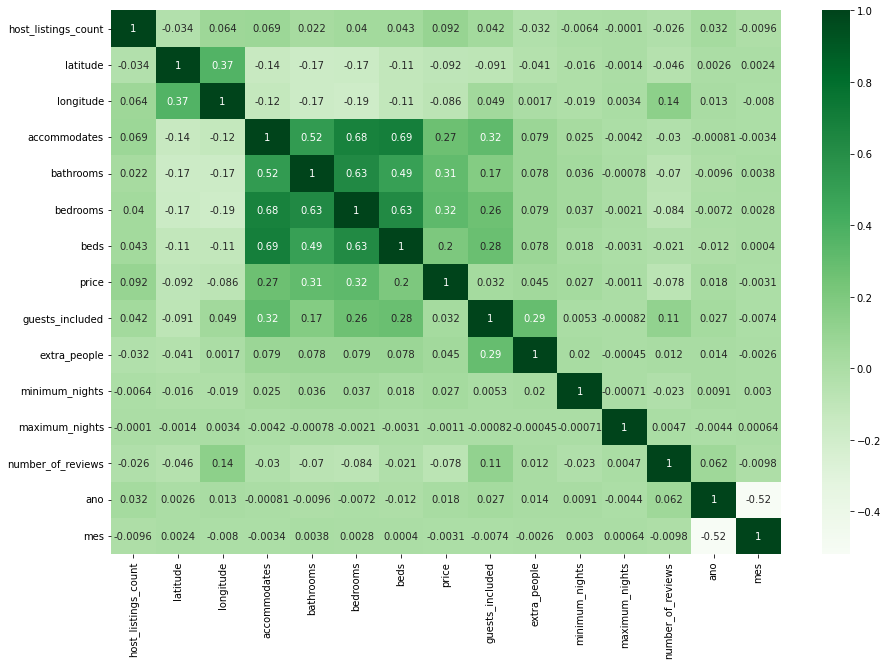

In [70]:
# print(baseDadosArbnb.corr())
plt.figure(figsize=(15, 10))
sns.heatmap(baseDadosArbnb.corr(), annot=True, cmap='Greens')

### Definição de funções para análise de outliers

Vamos definir algumas funções para ajudar na análise de outliers das colunas.

In [71]:
#Limites e remoção de outliers
def definirLimites(colunaArbnb): #Retorna o limite inferior e superior da coluna
    q1 = colunaArbnb.quantile(0.25)
    q3 = colunaArbnb.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude


def removerOutliers(dataframe, nomeColuna):
    qtdeLinhas = dataframe.shape[0]
    limiteInf, limiteSup = definirLimites(dataframe[nomeColuna])
    dataframe = dataframe.loc[(dataframe[nomeColuna] >= limiteInf) & (dataframe[nomeColuna] <= limiteSup) , :]
    qtdeLinhasRemovidas = qtdeLinhas - dataframe.shape[0]
    return dataframe, qtdeLinhasRemovidas


In [72]:
#Gráficos
def criarGraficoCaixa(colunaArbnb):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=colunaArbnb, ax=ax1)
    ax2.set_xlim(definirLimites(colunaArbnb))
    sns.boxplot(x=colunaArbnb, ax=ax2)


def criarGraficoHistograma(colunaArbnb):
    plt.figure(figsize=(15, 5))
    sns.distplot(colunaArbnb, hist=True)

    
def criarGraficoBarra(colunaArbnb):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=colunaArbnb.value_counts().index, y=colunaArbnb.value_counts())
    ax.set_xlim(definirLimites(colunaArbnb))

### Análise e tratamento dos outliers das colunas de valores numéricos

### Price

C:\Users\renan.leal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


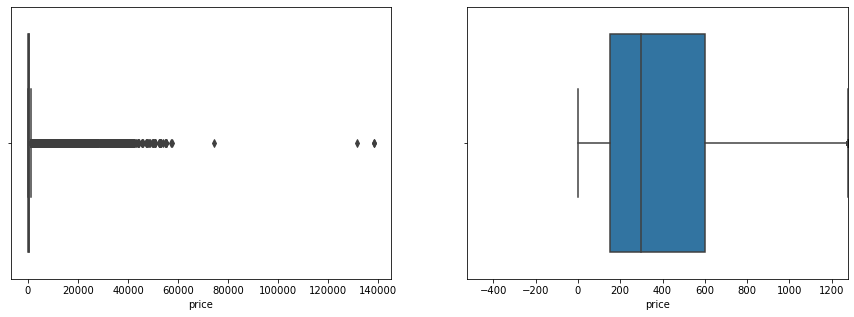

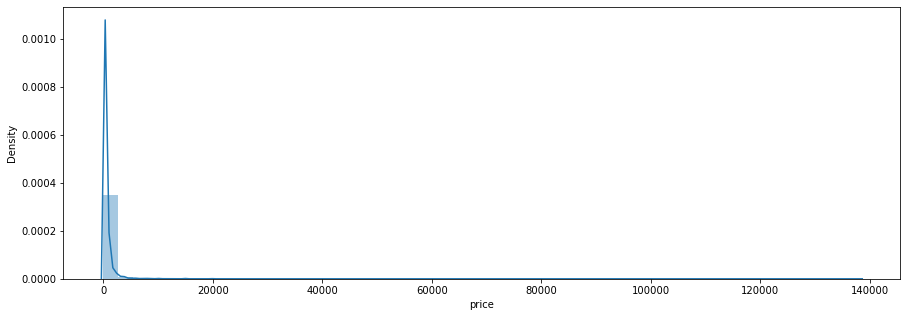

In [73]:
criarGraficoCaixa(baseDadosArbnb['price'])
criarGraficoHistograma(baseDadosArbnb['price'])

- O modelo será construido para imóveis comuns. Acredito que os valores dos imóveis que estão acima do limite superior são apenas de altíssimo luxo, por isso, excluirei esses outliers, porque não fazem parte do objetivo do modelo.

In [74]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'price')
print(f'{qtdeLinhasRemovidas} linhas removidas')

87282 linhas removidas


C:\Users\renan.leal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


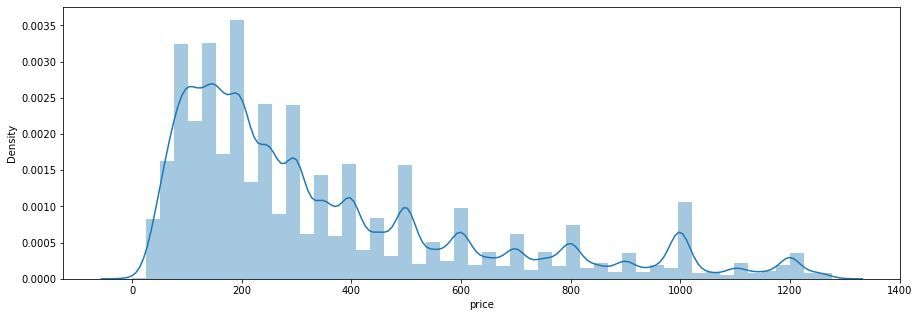

In [75]:
criarGraficoHistograma(baseDadosArbnb['price'])

### Extra people

C:\Users\renan.leal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


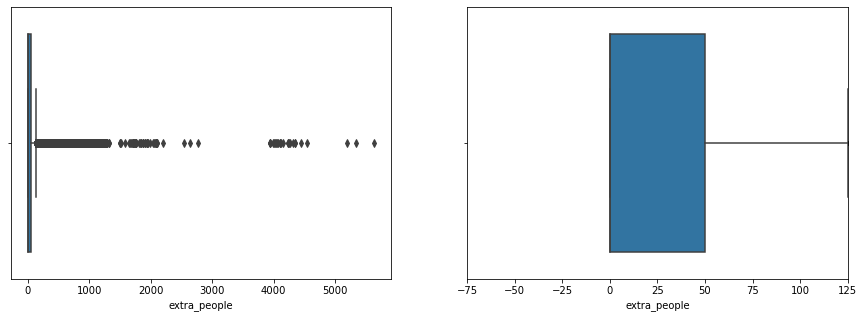

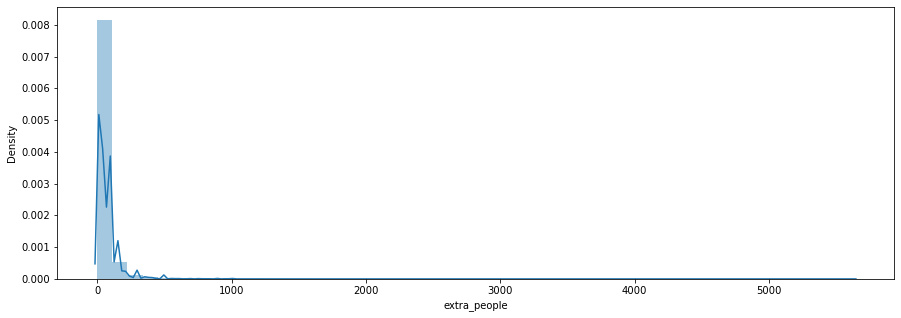

In [76]:
criarGraficoCaixa(baseDadosArbnb['extra_people'])
criarGraficoHistograma(baseDadosArbnb['extra_people'])

In [77]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'extra_people')
print(f'{qtdeLinhasRemovidas} linhas removidas')

59194 linhas removidas


### host_listings_count   

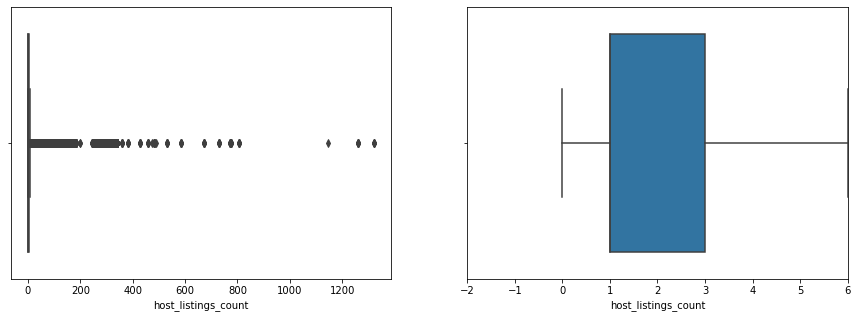

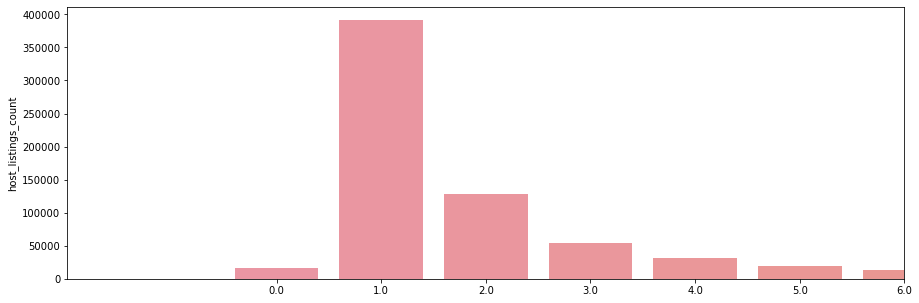

In [78]:
criarGraficoCaixa(baseDadosArbnb['host_listings_count'])
criarGraficoBarra(baseDadosArbnb['host_listings_count'])

- Os outliers serão excluídos por que hots com mais de 6 imóveis no arbnb não é o público alvo do projeto (acredito que sejam imobiliárias ou profissionais que gerenciam imóveis do arbnb)

In [79]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'host_listings_count')
print(f'{qtdeLinhasRemovidas} linhas removidas')

97723 linhas removidas


### accommodates  

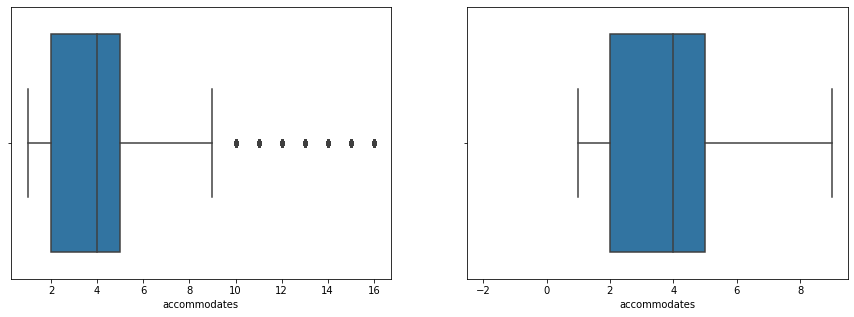

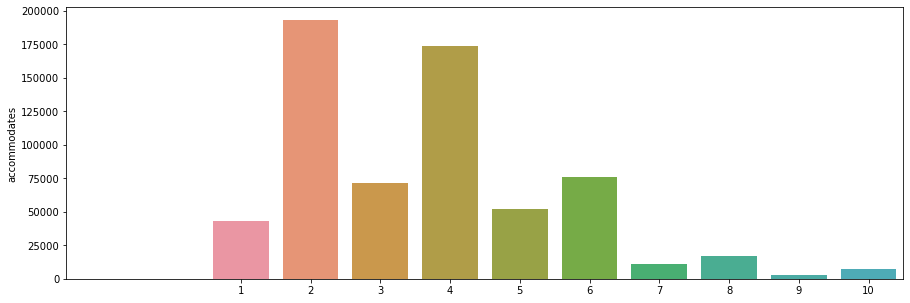

In [80]:
criarGraficoCaixa(baseDadosArbnb['accommodates'])
criarGraficoBarra(baseDadosArbnb['accommodates'])

In [81]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'accommodates')
print(f'{qtdeLinhasRemovidas} linhas removidas')

13146 linhas removidas


### bathrooms 

<AxesSubplot:ylabel='bathrooms'>

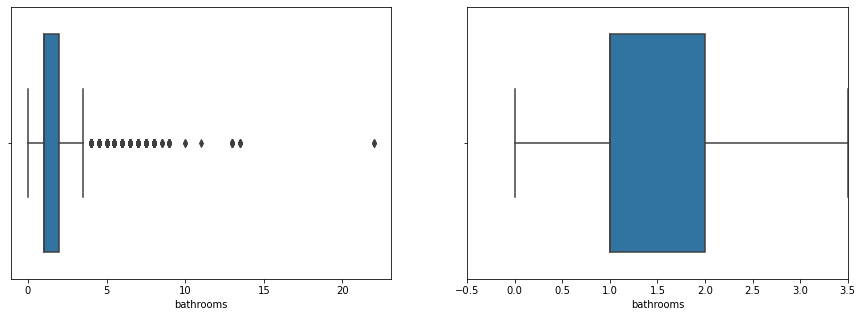

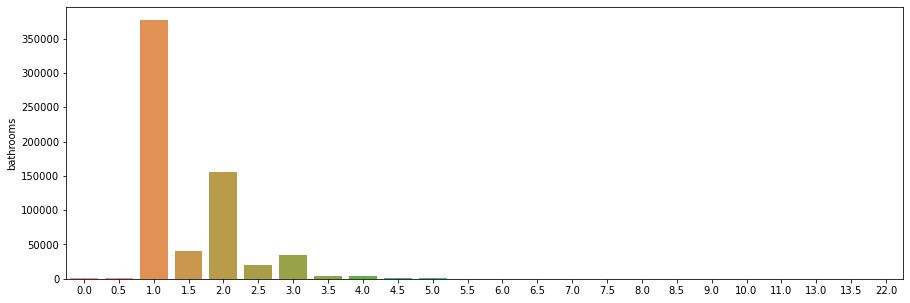

In [82]:
criarGraficoCaixa(baseDadosArbnb['bathrooms'])
#Como a função não plotou o gráfico com as informações correta, tratarei o gráfico de barras dos banheiros de forma separada.
plt.figure(figsize=(15,5))
sns.barplot(x=baseDadosArbnb['bathrooms'].value_counts().index, y=baseDadosArbnb['bathrooms'].value_counts())

In [83]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'bathrooms')
print(f'{qtdeLinhasRemovidas} linhas removidas')

6894 linhas removidas


### bedrooms

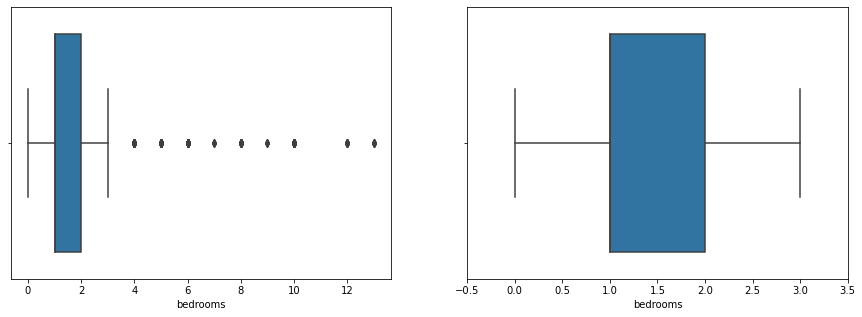

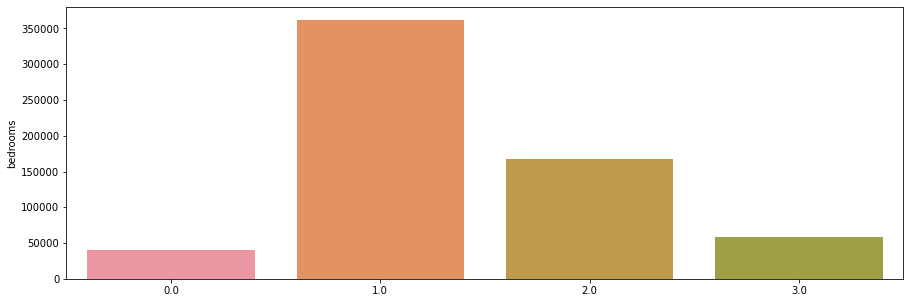

In [84]:
criarGraficoCaixa(baseDadosArbnb['bedrooms'])
criarGraficoBarra(baseDadosArbnb['bedrooms'])

In [85]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'bedrooms')
print(f'{qtdeLinhasRemovidas} linhas removidas')

5482 linhas removidas


### beds 

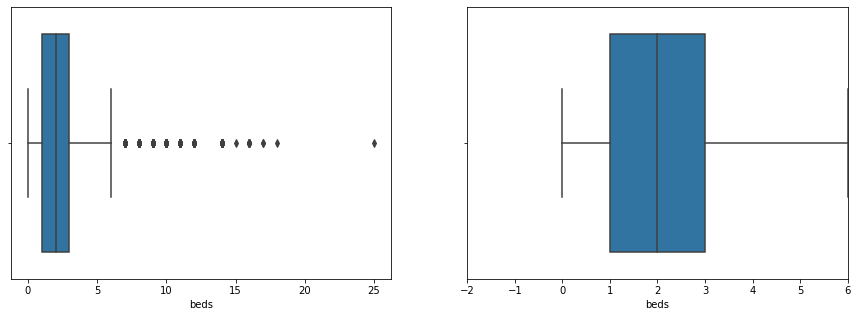

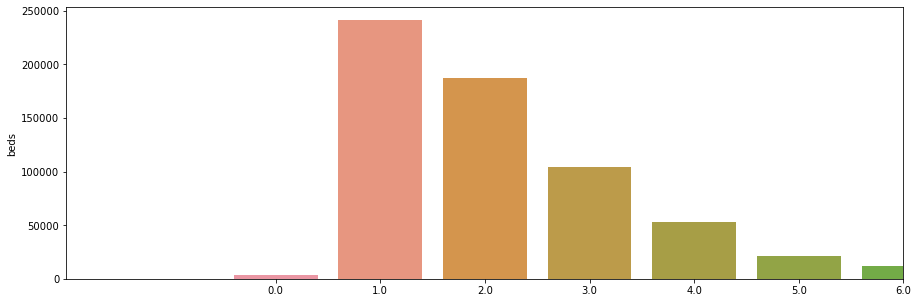

In [86]:
criarGraficoCaixa(baseDadosArbnb['beds'])
criarGraficoBarra(baseDadosArbnb['beds'])

In [87]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'beds')
print(f'{qtdeLinhasRemovidas} linhas removidas')

5622 linhas removidas


### guests_included  

Limite superior e inferior da coluna guests_included: (1.0, 1.0)


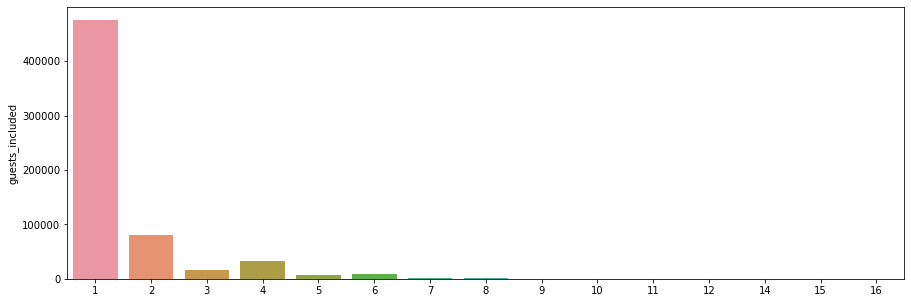

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x=baseDadosArbnb['guests_included'].value_counts().index, y=baseDadosArbnb['guests_included'].value_counts())
print('Limite superior e inferior da coluna guests_included: {}'.format(definirLimites(baseDadosArbnb['guests_included'])))

- Acredito que seja necessário remover essa feature da análise. Parece que os usuários do airbnb usam muito uma espécie de valor padrão quando o campo não é preenchido, exemplo: 1 guest included. Permanecer com essa feature pode levar o modelo a considerar algo que não é essencial para definição do preço.

In [89]:
baseDadosArbnb = baseDadosArbnb.drop('guests_included', axis=1)
baseDadosArbnb.shape

(622366, 22)

### minimum_nights   

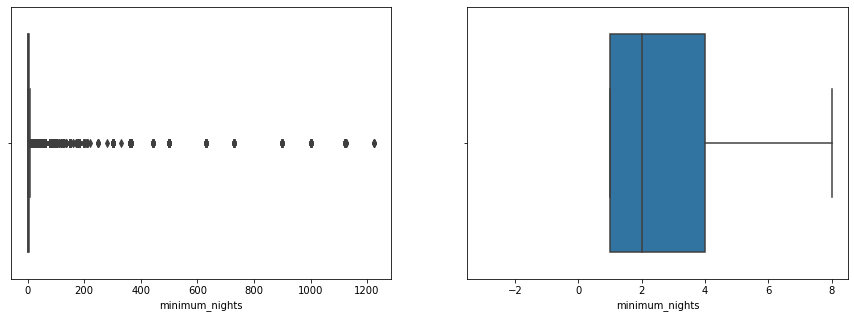

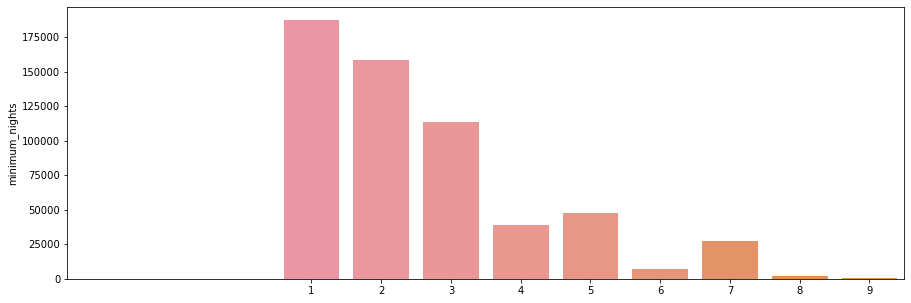

In [90]:
criarGraficoCaixa(baseDadosArbnb['minimum_nights'])
criarGraficoBarra(baseDadosArbnb['minimum_nights'])

In [91]:
baseDadosArbnb, qtdeLinhasRemovidas = removerOutliers(baseDadosArbnb, 'minimum_nights')
print(f'{qtdeLinhasRemovidas} linhas removidas')

40383 linhas removidas


### maximum_nights   

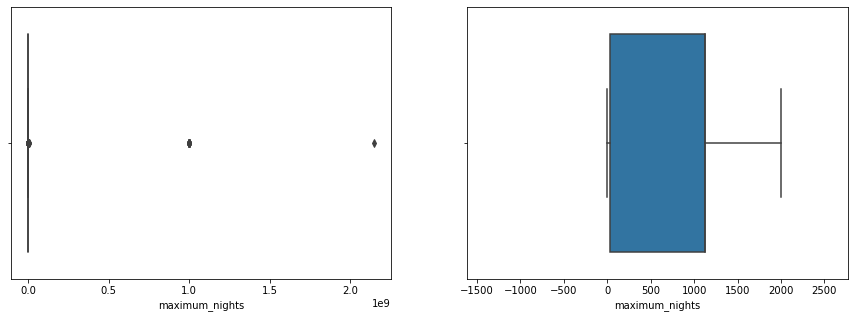

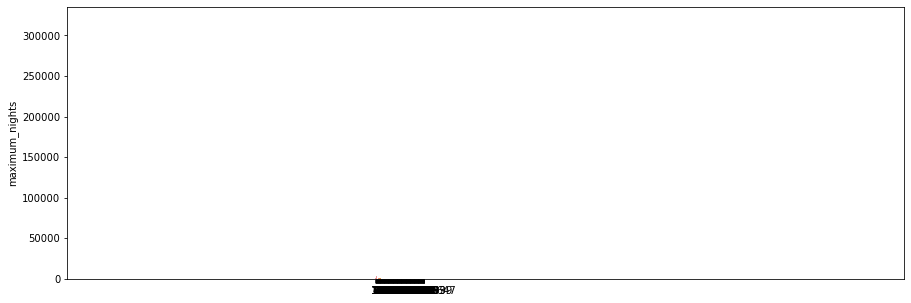

In [92]:
criarGraficoCaixa(baseDadosArbnb['maximum_nights'])
criarGraficoBarra(baseDadosArbnb['maximum_nights'])

- Decidi retirar essa feature, pois acredito que ela não impacte no preço. Além disso, como os valores máximos estavam distoando muito, acredito que essa coluna não seja uma métrica boa para o modelo.

In [93]:
baseDadosArbnb = baseDadosArbnb.drop('maximum_nights', axis=1)
baseDadosArbnb.shape

(581983, 21)

### number_of_reviews

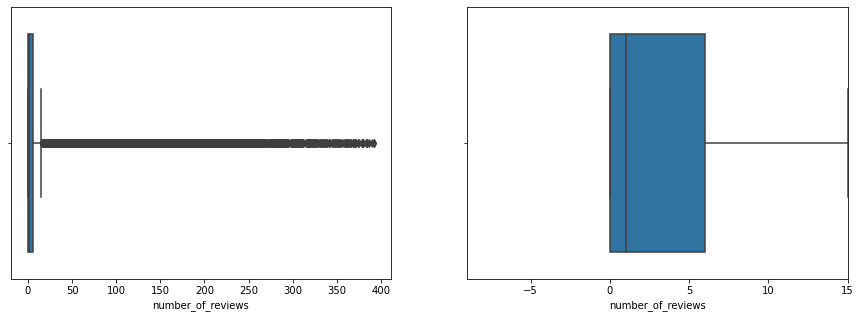

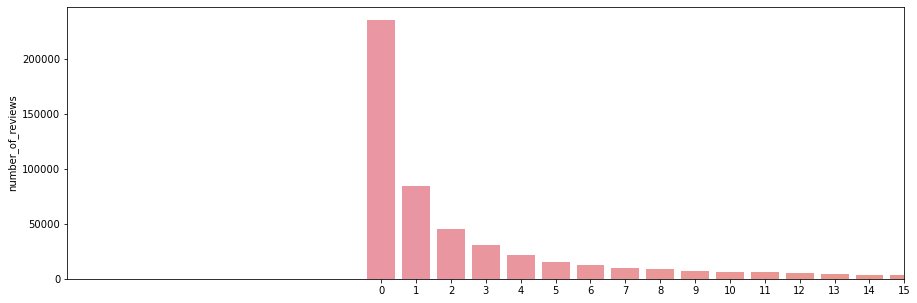

In [94]:
criarGraficoCaixa(baseDadosArbnb['number_of_reviews'])
criarGraficoBarra(baseDadosArbnb['number_of_reviews'])

- Como o modelo será criado para pessoas que estão iniciando saberem quanto deverão cobrar em seu imóvel, acredito que a coluna  number_of_reviews não será levada em consideração, pois os usuários iniciantes do airbnb começam sem reviews.

In [95]:
baseDadosArbnb = baseDadosArbnb.drop('number_of_reviews', axis=1)
baseDadosArbnb.shape

(581983, 20)

### Análise e tratamento dos outliers das colunas de valores de texto  

### property_type  

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

C:\Users\renan.leal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


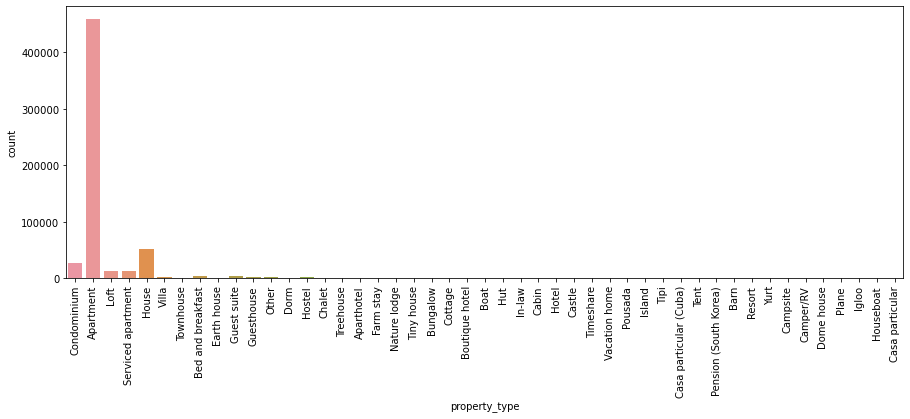

In [96]:
print(baseDadosArbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('property_type', data=baseDadosArbnb)
grafico.tick_params(axis='x', rotation=90)

In [100]:
for tipoImovel, quantidadeTipoImovel in baseDadosArbnb['property_type'].value_counts().items():
    if quantidadeTipoImovel < 2000:
        baseDadosArbnb.loc[baseDadosArbnb['property_type'] == tipoImovel, 'propety_type'] = 'Other'

In [114]:
tabelaTiposImovel = baseDadosArbnb['property_type'].value_counts()
imoveisAgrupados = [tipoImovel for tipoImovel in tabelaTiposImovel.index if tabelaTiposImovel[tipoImovel] < 2000]

room_type                   
bed_type                     
amenities                    
cancellation_policy 

### Encoding

### Modelo de Previsão

### Análise do Melhor Modelo

### Ajustes e Melhorias no Melhor Modelo